**CYBER THREAT**

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import pickle
import matplotlib.pyplot as plt
from itertools import cycle


*Data load and Presentation*

In [2]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/archive (3).zip')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv('/content/archive (3).zip')
print("Data Shape:", df.shape)
df.head()

Data Shape: (750, 11)


,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,1024,Phishing
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,512,DoS
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection


In [5]:
columns_to_drop = ['Timestamp', 'ID', 'Source IP Address', 'Destination IP Address',
                   'Source Port', 'Destination Port']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')
print("Columns after drop:", df.columns)

Columns after drop: Index(['Protocol', 'Flag', 'Packet', 'Sender ID', 'Receiver ID', 'Packet Size',
       'Target Variable'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target Variable'] = le.fit_transform(df['Target Variable'])

**Class Distribution**

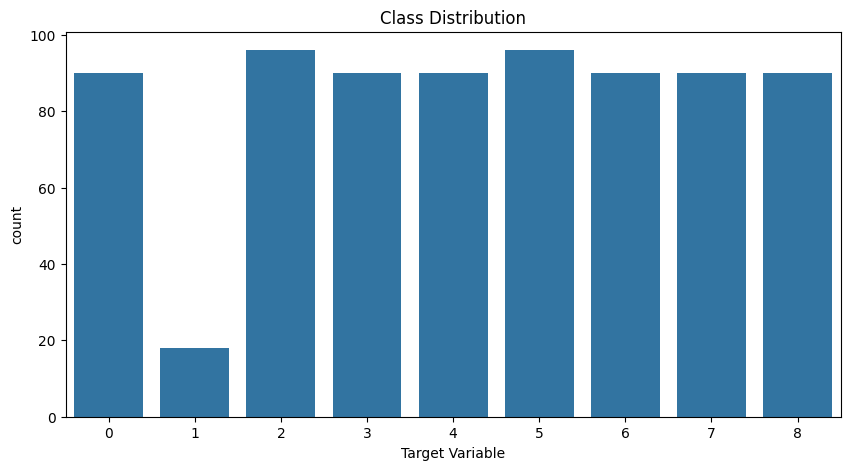

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(x='Target Variable', data=df)
plt.title('Class Distribution')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Target Variable', axis=1)
y = df['Target Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.dtypes)

Protocol       object
Flag           object
Packet         object
Sender ID       int64
Receiver ID     int64
Packet Size     int64
dtype: object


In [10]:
X = X.apply(pd.to_numeric, errors='coerce')  # converts non-numeric to NaN
X = X.fillna(0)  # fill missing if needed

In [11]:
# Convert to numeric before splitting
X = df.drop('Target Variable', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')  # Important!
X = X.fillna(0)

y = df['Target Variable']

# Now split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now scale safely
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SMOTE**

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

**RANDOM FOREST**

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

**XGBC**

In [14]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.5133333333333333

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.70        25
           1       0.00      0.00      0.00         0
           2       0.38      0.31      0.34        16
           3       0.57      0.57      0.57        14
           4       0.57      0.40      0.47        20
           5       0.36      0.25      0.30        16
           6       0.67      0.48      0.56        21
           7       0.61      0.79      0.69        24
           8       0.50      0.29      0.36        14

    accuracy                           0.51       150
   macro avg       0.48      0.43      0.44       150
weighted avg       0.56      0.51      0.52       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**COFUSION MATRIX**

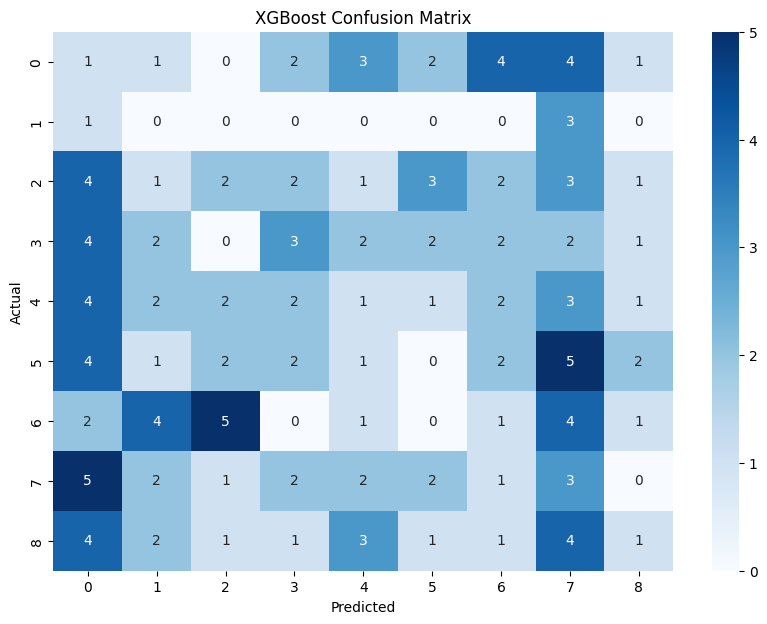

In [18]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

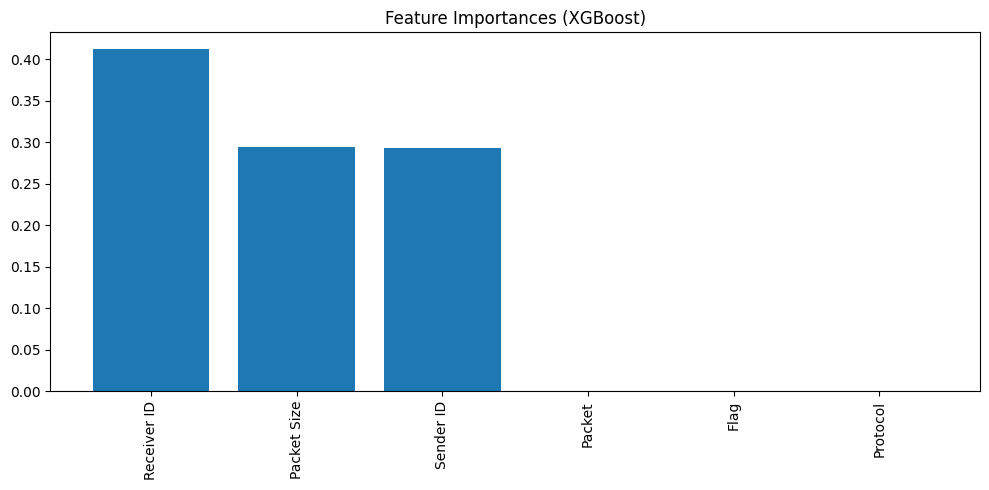

In [19]:
import numpy as np
plt.figure(figsize=(10, 5))
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances (XGBoost)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

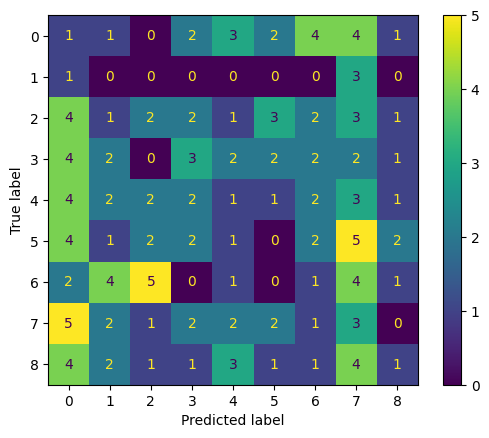

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0 1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**LOGISTIC REGRESSION**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [23]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))



Logistic Regression Accuracy: 0.21333333333333335
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00         4
           2       0.38      0.68      0.49        19
           3       0.24      0.44      0.31        18
           4       0.17      0.33      0.22        18
           5       0.13      0.21      0.16        19
           6       0.00      0.00      0.00        18
           7       0.10      0.06      0.07        18
           8       0.00      0.00      0.00        18

    accuracy                           0.21       150
   macro avg       0.11      0.19      0.14       150
weighted avg       0.13      0.21      0.15       150



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

**SVC**

In [24]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("\nSupport Vector Classifier Accuracy:", accuracy_score(y_test, svc_pred))
print("Classification Report:\n", classification_report(y_test, svc_pred))


Support Vector Classifier Accuracy: 0.23333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.33      0.26        18
           1       0.00      0.00      0.00         4
           2       0.24      0.63      0.35        19
           3       0.27      0.22      0.24        18
           4       0.23      0.33      0.27        18
           5       0.19      0.26      0.22        19
           6       0.50      0.11      0.18        18
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        18

    accuracy                           0.23       150
   macro avg       0.18      0.21      0.17       150
weighted avg       0.20      0.23      0.19       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
